In [162]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from dmba import classificationSummary, liftChart,gainsChart
from sklearn.model_selection import train_test_split


In [167]:
ebay = pd.read_csv('eBayAuctions.csv')
ebay.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [168]:
ebay.shape

(1972, 8)

In [169]:
ebay.dtypes

Category         object
currency         object
sellerRating      int64
Duration          int64
endDay           object
ClosePrice      float64
OpenPrice       float64
Competitive?      int64
dtype: object

In [170]:
# encode the category column 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
ebay['Category']=label_encoder.fit_transform(ebay['Category'])

In [171]:
# encode the currency column
ebay['currency'] = label_encoder.fit_transform(ebay['currency'])

In [172]:
ebay['endDay'] = label_encoder.fit_transform(ebay['endDay'])

In [173]:
# ebay = ebay.values.reshape(-1,1)

In [174]:
# from sklearn.preprocessing import OneHotEncoder
#onehot = OneHotEncoder()
#ebay['Category'] = onehot.fit_transform(ebay['Category']).toarray()

In [175]:
ebay.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,13,2,3249,5,1,0.01,0.01,0
1,13,2,3249,5,1,0.01,0.01,0
2,13,2,3249,5,1,0.01,0.01,0
3,13,2,3249,5,1,0.01,0.01,0
4,13,2,3249,5,1,0.01,0.01,0


In [176]:
ebay['Category'].unique()

array([13,  1, 16, 11,  2,  6,  3, 17,  8,  7,  9,  4,  5,  0, 12, 15, 10,
       14])

In [177]:
ebay['endDay'].unique()

array([1, 5, 0, 4, 2, 3, 6])

In [178]:
ebay['currency'].unique()

array([2, 1, 0])

In [179]:
ebay.dtypes

Category          int32
currency          int32
sellerRating      int64
Duration          int64
endDay            int32
ClosePrice      float64
OpenPrice       float64
Competitive?      int64
dtype: object

In [180]:
ebay.isna().sum()

Category        0
currency        0
sellerRating    0
Duration        0
endDay          0
ClosePrice      0
OpenPrice       0
Competitive?    0
dtype: int64

In [181]:
x = ebay.drop(columns =['Competitive?'])

In [182]:
y = ebay['Competitive?']

In [183]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.40,
                                                 random_state = 1)

## DecisionTree 

In [198]:
dt = DecisionTreeClassifier(random_state = 1)
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
classes = dt.classes_
classificationSummary(y_test, y_pred, class_names = classes)

Confusion Matrix (Accuracy 0.8580)

       Prediction
Actual   0   1
     0 310  43
     1  69 367


In [199]:
# putting the prediction into a new dataframe 
dt_proba = dt.predict_proba(x_test)
dt_result = pd.DataFrame({'actual':y_test,
                             'Predicted':dt_pred,
                             'Proba_0': [p[0] for p in dt_proba],
                             'proba_1': [p[1] for p in dt_proba]})
boosting_result.head()

,actual,Predicted,Proba_0,proba_1
480,1,1,1.434166e-08,1.0
258,1,1,1.512868e-08,1.0
159,1,1,1.571478e-08,1.0
158,1,1,2.845145e-08,1.0
1549,1,1,4.907630e-08,1.0


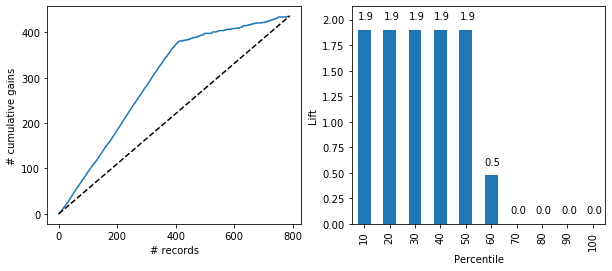

In [200]:
# draw the lift chart
dt_result = dt_result.sort_values(by=['proba_1'], ascending = False)
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
liftChart(dt_result['proba_1'], title = False, ax = axes[1])
gainsChart(dt_result['actual'], ax = axes[0])
plt.show()

In [ ]:
# the lift on the first decile is 1.9

## bagging

In [195]:
bagging = BaggingClassifier(DecisionTreeClassifier(random_state = 1),
                           n_estimators = 100, random_state = 1)
bagging.fit(x_train, y_train)
bagging_pred = bagging.predict(x_test)
classificationSummary(y_test, y_pred, class_names = classes)

Confusion Matrix (Accuracy 0.8580)

       Prediction
Actual   0   1
     0 310  43
     1  69 367


In [196]:
bagging_proba = bagging.predict_proba(x_test)
bagging_result = pd.DataFrame({'actual':y_test,
                             'Predicted':bagging_pred,
                             'Proba_0': [p[0] for p in bagging_proba],
                             'proba_1': [p[1] for p in bagging_proba]})
boosting_result.head()

,actual,Predicted,Proba_0,proba_1
480,1,1,1.434166e-08,1.0
258,1,1,1.512868e-08,1.0
159,1,1,1.571478e-08,1.0
158,1,1,2.845145e-08,1.0
1549,1,1,4.907630e-08,1.0


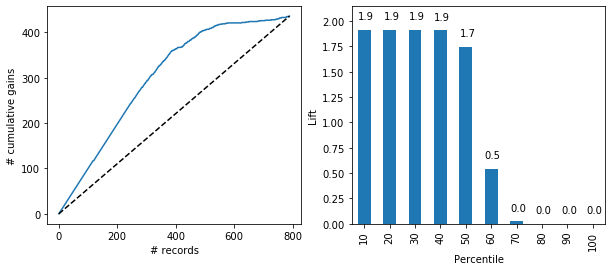

In [197]:
# draw the lift chart
boosting_result = boosting_result.sort_values(by=['proba_1'], ascending = False)
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
liftChart(boosting_result['proba_1'], title = False, ax = axes[1])
gainsChart(boosting_result['actual'], ax = axes[0])
plt.show()

In [ ]:
# the ift of the first decile is 1.9

## Boosting


In [188]:
boosting = AdaBoostClassifier(DecisionTreeClassifier(random_state = 1),
                             n_estimators = 100, random_state = 1)
boosting.fit(x_train,y_train)
boosting_pred = boosting.predict(x_test)
classificationSummary(y_test,y_pred, class_names = classes)

Confusion Matrix (Accuracy 0.8580)

       Prediction
Actual   0   1
     0 310  43
     1  69 367


In [193]:
boosting_proba = boosting.predict_proba(x_test)
boosting_result = pd.DataFrame({'actual':y_test,
                             'Predicted':boosting_pred,
                             'Proba_0': [p[0] for p in boosting_proba],
                             'proba_1': [p[1] for p in boosting_proba]})
boosting_result.head()

,actual,Predicted,Proba_0,proba_1
1287,0,0,0.999553,0.000447
1017,1,1,0.000013,0.999987
1047,0,0,0.999924,0.000076
108,1,1,0.000002,0.999998
1084,1,1,0.014499,0.985501


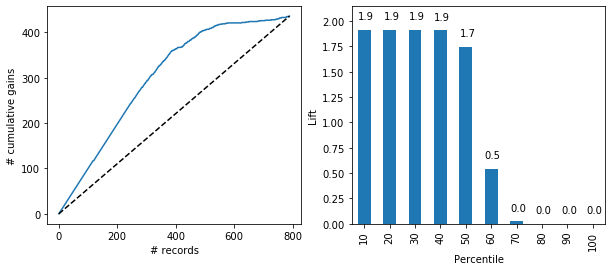

In [194]:
# draw the lift chart
boosting_result = boosting_result.sort_values(by=['proba_1'], ascending = False)
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
liftChart(boosting_result['proba_1'], title = False, ax = axes[1])
gainsChart(boosting_result['actual'], ax = axes[0])
plt.show()

In [ ]:
# the lift for the first decile is 1.9

## Random Forest

In [147]:
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 1)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
classificationSummary(y_test,y_pred, class_names = classes)

Confusion Matrix (Accuracy 0.8745)

       Prediction
Actual   0   1
     0 324  29
     1  70 366


In [153]:
# putting the result in a dataframe 
r_forst_proba = random_forest.predict_proba(x_test)
forest_result = pd.DataFrame({'actual':y_test,
                             'Predicted':y_pred,
                             'Proba_0': [p[0] for p in r_forst_proba],
                             'proba_1': [p[1] for p in r_forst_proba]})
forest_result.head(10)

,actual,Predicted,Proba_0,proba_1
1287,0,0,0.990000,0.010000
1017,1,1,0.010000,0.990000
1047,0,0,1.000000,0.000000
108,1,1,0.000000,1.000000
1084,1,1,0.350000,0.650000
87,1,1,0.000000,1.000000
421,1,1,0.050000,0.950000
1412,0,0,0.740000,0.260000
414,1,1,0.003333,0.996667
285,1,1,0.000000,1.000000


In [156]:
# to get the intersting casses
cases = [414, 1412]
print(forest_result.loc[cases])

      actual  Predicted   Proba_0   proba_1
414        1          1  0.003333  0.996667
1412       0          0  0.740000  0.260000


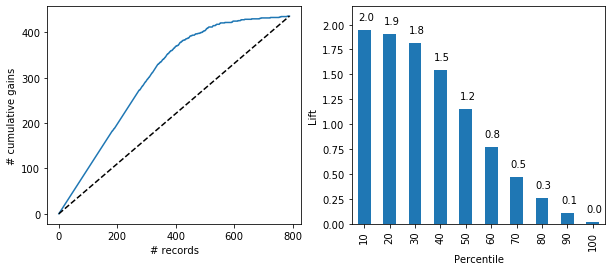

In [164]:
# draw the lift chart
forest_result = forest_result.sort_values(by=['proba_1'], ascending = False)
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
liftChart(forest_result['proba_1'], title = False, ax = axes[1])
gainsChart(forest_result['actual'], ax = axes[0])
plt.show()

In [201]:
# the lift on the first decile is 2.0

In [ ]:
# bagging adjust the weight of the observation based on the previous classification
# Boosting it waeights the models based on their performance and decrease the bais